In [1]:
from lifelines.datasets import load_waltons
%matplotlib inline
df = load_waltons() # returns a Pandas DataFrame

print(df.head())

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137


In [2]:
T = df['T']
E = df['E']

In [3]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

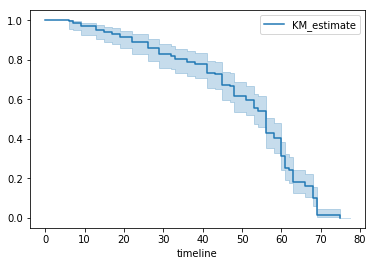

In [4]:
kmf.survival_function_
kmf.median_
kmf.plot()

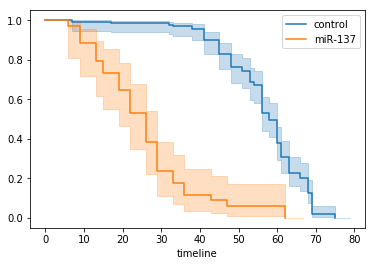

In [5]:
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='miR-137')
kmf.plot(ax=ax)

# Load in the Modelling Data

In [6]:
import pandas as pd
data = pd.read_pickle('clean_data_for_modelling3.p')
data.head()

,viewer_id,one_day_mins,two_day_mins,seven_day_mins,one_sim,two_sim,seven_sim,sixteen_twentyfour,sixteen_thirtyfour,affluency,female_flag,hub_tenure,boi_within_seven_days,hub_plus_tenure,dau_within_seven_days,avg_sessions,churn_binary
0,abbbbb21-a32d-4d49-8ef2-989547921117,186.463233,186.463233,379.800917,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,1392.0,4,1,4,1,1
1,67c14870-ef0c-4f04-a335-9fe988f65ed0,68.834717,70.168050,235.574733,0.000000,0.000000,53.566667,1.0,1.0,0.0,0.0,1351.0,3,3,5,1,1
2,76b19b27-0cb9-4cec-b3e2-3118e013e1e6,33.570467,79.828500,79.828500,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,949.0,1,4,2,1,1
3,a47065aa-5ea4-4e6f-849c-37fd6259a3bb,0.000000,138.821367,138.821367,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1269.0,1,8,1,1,1
4,85ae97f4-1bc1-40d8-a958-4bd2e0236918,141.354033,141.354033,141.354033,21.283333,21.283333,21.283333,1.0,1.0,1.0,1.0,1180.0,3,1,2,1,1


# Set the Duration and Outcome variables as hub_plus_tenure and churn_binary respectively

In [7]:
T = data['hub_plus_tenure']
E = data['churn_binary']
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 74709 observations, 45063 censored>

# Use the Kaplan-Meier Estimator to plot the Survival Curve

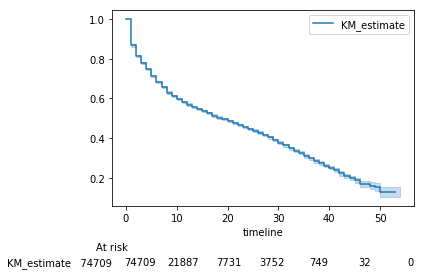

In [8]:
from lifelines.plotting import add_at_risk_counts
kmf.survival_function_
kmf.median_
kmf.plot(at_risk_counts = True)

# Use the NelsonAalenFitter to generate the Cumulative Hazard Function

          NA_estimate
timeline             
0.0          0.000000
1.0          0.144024
2.0          0.207915
3.0          0.252791
4.0          0.292775


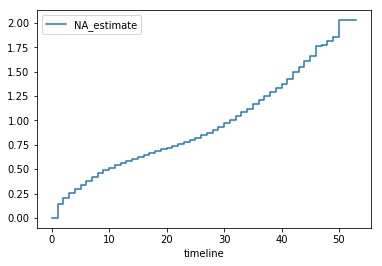

In [9]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T,event_observed=E)
print(naf.cumulative_hazard_.head())
naf.plot()

In [10]:
data = data.set_index('viewer_id')
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(data, duration_col='hub_plus_tenure', event_col='churn_binary')
cph.print_summary()

LinAlgError: Matrix is singular.

In [11]:
from lifelines import WeibullFitter
T = data['hub_plus_tenure']
E = data['churn_binary']
wf = WeibullFitter()
wf.fit(T, E)
print(wf.lambda_, wf.rho_)
wf.print_summary()

0.042231868335898495 0.8099112304523319
n=74709, number of events=29646

          coef  se(coef)  lower 0.95  upper 0.95
lambda_ 0.0422    0.0003      0.0416      0.0429
rho_    0.8099    0.0038      0.8025      0.8173


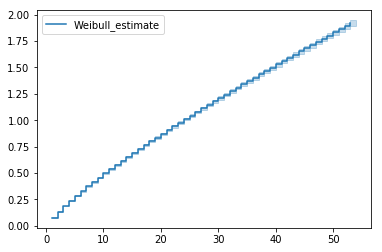

In [12]:
wf.plot()